In [35]:
# We begin by considering a partial differential equation with only one
# spatial direction. This is basically a 1D boundary value once we discretise
# time.
# Consider the one dimensional heat equation
# ∂f(x,t)/∂t = ∂^2f(x,t)/∂x^2
# with boundary conditions f(0, t) = 1 and ∂_x f(1, t) = 0. This means that
# we keep the left end at temperature 1 and let no heat escape or enter at the
# right end.
# The steady state of this equation is clearly f(x, t) = 1. We will
# consider the time evolution starting from f(x, 0) = e^−5x.
# Using implicit time discretisation we have
# f_{t+dt}(x) = f_t (x) + f_{t+dt}'' (x) dt.

# Use a second order finite difference scheme to turn the above into
# a linear algebra problem using N = 1000 grid points.

#a
import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 1 
x = np.linspace(0, L, N)
f_initial = np.exp(-5*x)

f = np.exp(-5*x)

dt = 0.05
dx = L/N

steps = 1000

A = np.zeros((N, N))

for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx**2
    A[i, i - 1] = -dt / dx**2
    A[i, i + 1] = -dt / dx**2

# boundary condition
A[0,0] = 1 
    
A[-1,-1] = (3/2) /dx
A[-1,-2] = (-2)/dx
A[-1,-3] = (1/2)/dx
for i in range(1, steps):
    # boundary condition
    f[0] = 1
    f[-1] = 0
    
    f = np.linalg.solve(A, f)



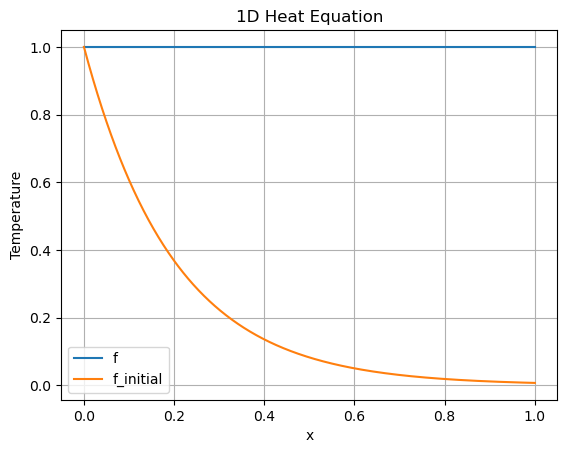

In [36]:
plt.plot(x, f, label='f')
plt.plot(x,f_initial, label='f_initial')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.legend()
plt.grid(True)
plt.show()

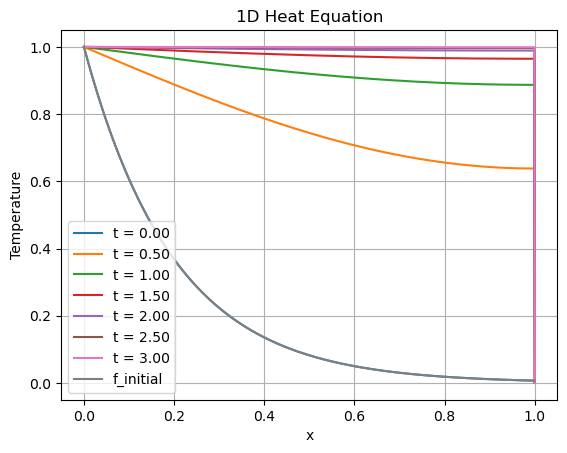

In [37]:
#b
# Solve the system using Δt = 0.05 for t ∈ [0, 3] and plot curves for
# t ∈ {0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0}.

import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 1
x = np.linspace(0, L, N)
f_initial = np.exp(-5 * x)

f = np.exp(-5 * x)

dt = 0.05
dx = L / N

A = np.zeros((N, N))

for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx ** 2
    A[i, i - 1] = -dt / dx ** 2
    A[i, i + 1] = -dt / dx ** 2

# boundary condition
A[0, 0] = 1
A[-1, -1] = (3 / 2) / dx
A[-1, -2] = (-2) / dx
A[-1, -3] = (1 / 2) / dx

time_points = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

for t in range(steps):
    # boundary condition
    f[0] = 1
    f[-1] = 0

    if t * dt in time_points:
        plt.plot(x, f, label=f't = {t * dt:.2f}')

    f = np.linalg.solve(A, f)

plt.plot(x, f_initial, label='f_initial')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.legend()
plt.grid(True)
plt.show()

